k-NN Sampling for Visualization of Dynamic data using LION-tSNE

Datasets

In [42]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import cv2                                                   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
breast_cancer = load_breast_cancer()
wine = load_wine()
mnsit = fetch_openml('mnist_784', parser='auto')
olivetti_faces = fetch_olivetti_faces(shuffle=True, random_state=42)


iris_data = iris.data  # Features (150 samples, 4 dimensions)
iris_target = iris.target  # Target labels (0, 1, or 2 )

breast_cancer_data = breast_cancer.data  # Features (569 samples, 30 dimensions)
breast_cancer_target = breast_cancer.target  # Target labels (0 or 1)

wine_data = wine.data  # Features (178 samples, 13 dimensions)
wine_target = wine.target  # Target labels (0, 1, or 2)

mnsit_data = mnsit.data  # Features (70k samples, 784 dimensions)
mnsit_target = mnsit.target  # Target labels (0, 1, 2,..., or 9)


original_olivetti_faces_data = olivetti_faces.data  # Features (400 samples, 4096 dimensions). From the library. 

num_images, original_height, original_width = original_olivetti_faces_data.shape[0], 64, 64     # Number of images and the original image dimensions
original_images = [np.reshape(image, (original_height, original_width)) for image in original_olivetti_faces_data]  # to reshape the images to their original dimensions (64x64)
upscaled_olivetti_faces_data = [cv2.resize(image, (128, 128)).flatten() for image in original_images] # to Upscale the images from 64x64 to 128x128 pixels ( to give 16384 dimensions)

olivetti_faces_data = np.array(upscaled_olivetti_faces_data)  # to convert the images to a 1D array to get 16384 dimensions. # Features (400 samples, 16384 dimensions)

olivetti_faces_target = olivetti_faces.target  # Target labels (0, 1, 2,..., or 39 ) 





Data Preprocessing

In [43]:
# To remove redundant data points in iris_data

iris_df = pd.DataFrame(iris_data)
 
iris_df.drop_duplicates(inplace=True)    # To identify and remove duplicates

iris_data = iris_df.values     # To convert the cleaned data back to a NumPy array 


# To fill empty variables with appropriate values in iris_data

missing_values_1 = np.isnan(iris_data).any()   # To check for missing values (There were none)

if missing_values_1:
    iris_data = np.nan_to_num(iris_data, nan=np.nanmean(iris_data))    # To replace missing values with the mean





# To remove redundant data points in breast_cancer_data

breast_cancer_df = pd.DataFrame(breast_cancer_data)
 
breast_cancer_df.drop_duplicates(inplace=True)    # To identify and remove duplicates

breast_cancer_data = breast_cancer_df.values     # To convert the cleaned data back to a NumPy array 


# To fill empty variables with appropriate values in breast_cancer_data

missing_values_2 = np.isnan(breast_cancer_data).any()   # To check for missing values (There were none)

if missing_values_2:
    breast_cancer_data = np.nan_to_num(breast_cancer_data, nan=np.nanmean(breast_cancer_data))    # To replace missing values with the mean






# To remove redundant data points in wine_data

wine_df = pd.DataFrame(wine_data)
 
wine_df.drop_duplicates(inplace=True)    # To identify and remove duplicates

wine_data = wine_df.values     # To convert the cleaned data back to a NumPy array 


# To fill empty variables with appropriate values in wine_data

missing_values_3 = np.isnan(wine_data).any()   # To check for missing values (There were none)

if missing_values_3:
    wine_data = np.nan_to_num(wine_data, nan=np.nanmean(wine_data))    # To replace missing values with the mean







# To remove redundant data points in mnsit_data

mnsit_df = pd.DataFrame(mnsit_data)
 
mnsit_df.drop_duplicates(inplace=True)    # To identify and remove duplicates

mnsit_data = mnsit_df.values     # To convert the cleaned data back to a NumPy array 


# To fill empty variables with appropriate values in mnsit_data

missing_values_4 = np.isnan(mnsit_data).any()   # To check for missing values (There were none)

if missing_values_4:
    mnsit_data = np.nan_to_num(mnsit_data, nan=np.nanmean(mnsit_data))    # To replace missing values with the mean







# To remove redundant data points in olivetti_faces_data

olivetti_faces_df = pd.DataFrame(olivetti_faces_data)
 
olivetti_faces_df.drop_duplicates(inplace=True)    # To identify and remove duplicates

olivetti_faces_data = olivetti_faces_df.values     # To convert the cleaned data back to a NumPy array in the 16384 dimensions


# To fill empty variables with appropriate values in olivetti_faces_data

missing_values_5 = np.isnan(olivetti_faces_data).any()   # To check for missing values (There were none)

if missing_values_5:
    olivetti_faces_data = np.nan_to_num(olivetti_faces_data, nan=np.nanmean(olivetti_faces_data))    # To replace missing values with the mean







# Define your maximum dataset size
max_dataset_size = 10000  # Adjust this to your desired limit


# Check the size of the dataset
current_dataset_size1 = iris_data.shape[0]

# Truncate the dataset if it exceeds the limit
if current_dataset_size1 > max_dataset_size:
    truncated_iris_data = iris_data[:max_dataset_size]   # Slice the dataset to limit its size
else:
    truncated_iris_data = iris_data  # to keep the dataset as is




current_dataset_size2 = breast_cancer_data.shape[0]

if current_dataset_size2 > max_dataset_size:
    truncated_breast_cancer_data = breast_cancer_data[:max_dataset_size]  
else:
    truncated_breast_cancer_data = breast_cancer_data  



current_dataset_size3 = wine_data.shape[0]

if current_dataset_size3 > max_dataset_size:
    truncated_wine_data = wine_data[:max_dataset_size]  
else:
    truncated_wine_data = wine_data  



current_dataset_size4 = mnsit_data.shape[0]

if current_dataset_size4 > max_dataset_size:
    truncated_mnsit_data = mnsit_data[:max_dataset_size]  
else:
    truncated_mnsit_data = mnsit_data  




current_dataset_size5 = olivetti_faces_data.shape[0]

if current_dataset_size5 > max_dataset_size:
    truncated_olivetti_faces_data = olivetti_faces_data[:max_dataset_size]  
else:
    truncated_olivetti_faces_data = olivetti_faces_data  






k-NN Sampling for train_sample selection using mnsit_data only with tSNE model

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 2.039419
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.590034
[t-SNE] KL divergence after 1000 iterations: 0.373728
[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 2.101485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.182476
[t-SNE] KL divergence after 1000 iterations: 0.361914
[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.001s...
[t-SNE] Computed neighbors for 50 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 2.126407
[t-SNE] KL divergence after 250 iterations with earl

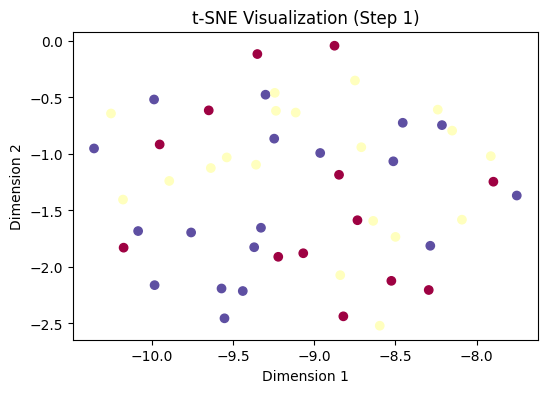

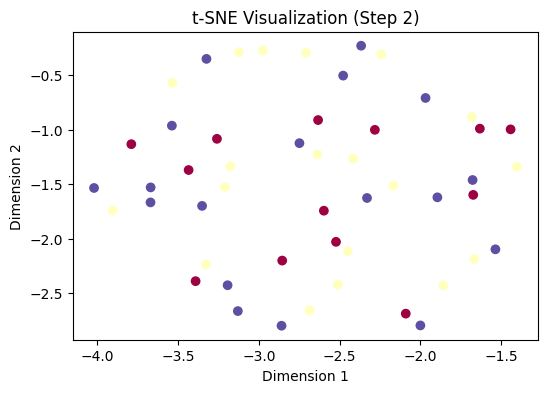

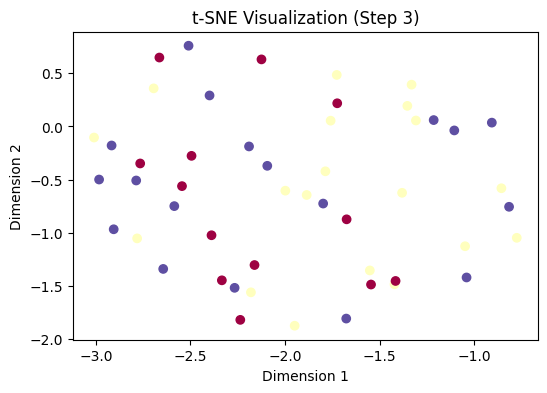

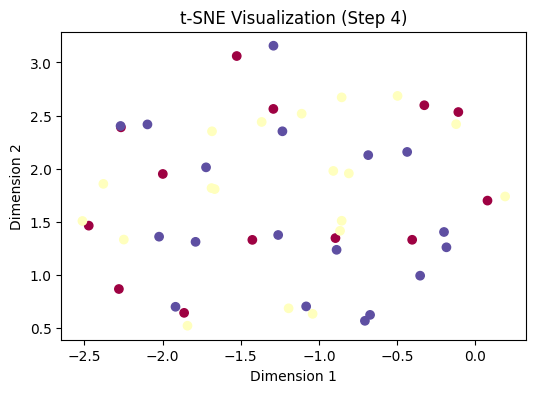

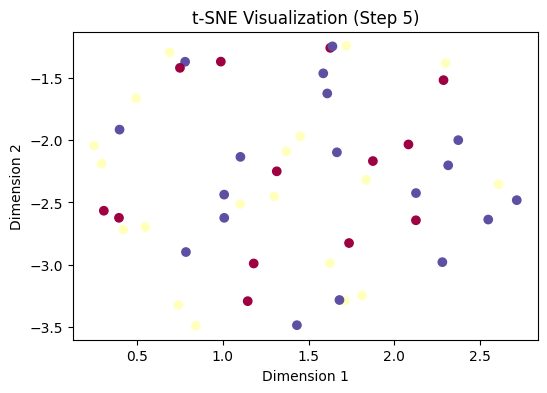

In [44]:
#k-NN Sampling Algorithm mnsit_data
    
def knn_sampling(X, k):
        
    train_sample = X.copy()

    while len(train_sample) > k:
          #Compute K-Nn graph X
        nn = NearestNeighbors(n_neighbors=k + 1).fit(train_sample)
        distances, indices = nn.kneighbors(train_sample)
        knn_scores = np.sum(distances[:, 1:], axis=1)

            #Compute N N Scores
        nn_score = knn_scores / knn_scores.sum()
            
            #Compute M N N Scores
        mnn_score = np.zeros(len(train_sample))
            
        for i in range(len(train_sample)):
            mutual_neighbors = set(indices[i][1:]) & set(indices[i])
            mnn_score[i] = sum(nn_score[list(mutual_neighbors)])
                
        index = [i for i, score in enumerate(nn_score) if score == max(nn_score)]
            
        if len(index) > 1:
            mnn_scores = [mnn_score[i] for i in index]
            train_index = index[mnn_scores.index(max(mnn_scores))]
        else:
            train_index = index[0]
            
        train_sample = np.delete(train_sample, train_index, axis=0)

    return train_sample
 

 

    
# Low-dimensional embedding of data: tSNE Model.


initial_samples = 100             # initial sampling value from dataset 

n_steps = 5                      # number of Time_steps 

k = 50                            # to set the desired number of training samples (knn sampling parameter)

tsne = TSNE(n_components=2, perplexity=30, verbose = 1)

# Initial samples
dynamic_dataset = np.random.rand(initial_samples, 2)

labels = np.random.choice([0, 1, 2], size=initial_samples)

# Lists to store tsne results and label at each time step
tsne_results = []

all_labels = []

for step in range(1, n_steps + 1):
    
    new_data = truncated_mnsit_data
    
    # Concatenate the new data with the existing dataset
    
    dynamic_dataset = np.random.rand(initial_samples, new_data.shape[1])
    
    new_labels = mnsit_target[:len(new_data)]
    
    # Concatenate the labels for the new data
    labels = np.hstack([labels, new_labels])

    # Perform K-NN sampling
    train_sample = knn_sampling(dynamic_dataset, k)

    # Perform t-SNE on the 'train_sample' data
    mnsit_2d = tsne.fit_transform(train_sample) 
    
    # output result: the algorithm quickly finds a good representation with low KL divergence.
    

    tsne_results.append(mnsit_2d)

    all_labels.append(labels[:len(train_sample)])   # Store labels at each step for existing data points
    
    



#Visualizing t-SNE results at each time step with colored clusters
for step, (tsne_result, step_labels) in enumerate(zip(tsne_results, all_labels)):
    plt.figure(figsize=(6, 4))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=step_labels, cmap=plt.cm.Spectral)
    plt.title(f't-SNE Visualization (Step {step + 1})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()    
    
    

Low-dimensional embedding of data: LION-tSNE 

In [45]:

# LION-tSNE [Interpolation and Outlier handling] 

# This is used to add new data points to the tSNE model



# Using the Cluster-Based Approach (K-Means) method to identify inliers and outliers


kmeans = KMeans(n_clusters=2, n_init='auto')  # the number of clusters is specified
cluster_labels = kmeans.fit_predict(mnsit_2d)

# Specify the cluster label for inliers
inlier_cluster_label = 0

# Identify inliers and outliers based on cluster assignments
inliers = mnsit_2d[cluster_labels == inlier_cluster_label]
outliers = mnsit_2d[cluster_labels != inlier_cluster_label]




# Inlier Interpolation (IDW Interpolation)

def idw_interpolation(inliers, rxNN, mnsit_2d):
    interpolated_inliers = []

    for inlier in inliers:
        # Calculate the distance between inlier and all other data points in mnsit_2d
        distances = np.linalg.norm(mnsit_2d - inlier, axis=1)

        # Check if the distance is less than rxNN (within the radius)
        in_radius = np.where(distances < rxNN)[0]

        if len(in_radius) == 0:
            continue  # No inliers found within the radius, skip this inlier

        # Calculate the weights based on distances (inverse distance weighting)
        weights = 1 / (distances[in_radius] + 1e-9)  # Adding small epsilon to avoid division by zero

        # Perform weighted average to interpolate the inlier
        interpolated_inlier = np.average(mnsit_2d[in_radius], weights=weights, axis=0)
        interpolated_inliers.append(interpolated_inlier)

    interpolated_inliers = np.array(interpolated_inliers)
    return interpolated_inliers

# Random Placement of Unrelated Outliers
def random_placement_unrelated_outliers(unrelated_outliers, predefined_locations):
    # Place unrelated outliers randomly in predefined locations
    if len(unrelated_outliers) > len(predefined_locations):
        print("Error: Not enough predefined locations for unrelated outliers")
        return []

    np.random.shuffle(unrelated_outliers)
    for i in range(len(unrelated_outliers)):
        unrelated_outliers[i] = predefined_locations[i]

    return unrelated_outliers

# Placement of Related Outliers
def place_related_outliers(related_outliers, tSNE_outliers, rclose):
    placed_related_outliers = []

    for related_outlier in related_outliers:
        # Find the nearest t-SNE outlier
        distances = np.linalg.norm(tSNE_outliers - related_outlier, axis=1)
        nearest_tSNE_outlier = tSNE_outliers[np.argmin(distances)]

        # Place the related outlier near the nearest t-SNE outlier based on rclose
        direction = nearest_tSNE_outlier - related_outlier
        placed_related_outlier = related_outlier + rclose * direction

        placed_related_outliers.append(placed_related_outlier)

    placed_related_outliers = np.array(placed_related_outliers)
    return placed_related_outliers

# Determine Locations of Identified Outliers Using ryNN
def determine_outlier_locations(identified_outliers, ryNN):
    determined_outliers = []

    for identified_outlier in identified_outliers:
        determined_outlier = identified_outlier + np.random.uniform(-ryNN, ryNN, size=(1, mnsit_2d.shape[1]))
        determined_outliers.append(determined_outlier)

    determined_outliers = np.array(determined_outliers)
    return determined_outliers



rxNN = 1  # value for the minimum radius of input data
rclose = 0.5  # value for placing related outliers close to each other
ryNN = 1  # value for minimum distance from data points to outliers, and from outliers to outliers.



unrelated_outliers = np.random.rand(5, mnsit_2d.shape[1])  # 5 unrelated outliers
related_outliers = np.random.rand(3, mnsit_2d.shape[1])  # 3 related outliers
identified_outliers = np.random.rand(2, mnsit_2d.shape[1])  # 2 identified outliers


#Inlier Interpolation
interpolated_inliers = idw_interpolation(inliers, rxNN, mnsit_2d)

#Random Placement of Unrelated Outliers
randomly_placed_outliers = random_placement_unrelated_outliers(unrelated_outliers, mnsit_2d)

#Placement of Related Outliers
placed_related_outliers = place_related_outliers(related_outliers, mnsit_2d, rclose)

#Determine Locations of Identified Outliers Using ryNN
determined_outliers = determine_outlier_locations(identified_outliers, ryNN)

# Reshape determined_outliers from 3D to 2D
reshaped_determined_outliers = determined_outliers.reshape((determined_outliers.shape[0], determined_outliers.shape[2]))


# Combine all points for t-SNE Model
combined_points = np.concatenate([mnsit_2d, interpolated_inliers, randomly_placed_outliers, placed_related_outliers, reshaped_determined_outliers])

#Run t-SNE on the Combined Points

combined_mnsit_2d = tsne.fit_transform(combined_points) # The result includes the inliers, unrelated outliers, and related outliers




[t-SNE] Computing 83 nearest neighbors...
[t-SNE] Indexed 84 samples in 0.000s...
[t-SNE] Computed neighbors for 84 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 84 / 84
[t-SNE] Mean sigma: 0.639097
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.870541
[t-SNE] KL divergence after 1000 iterations: -0.130349


k-NN Accuracy

k-NN Accuracy : 0.6538461538461539


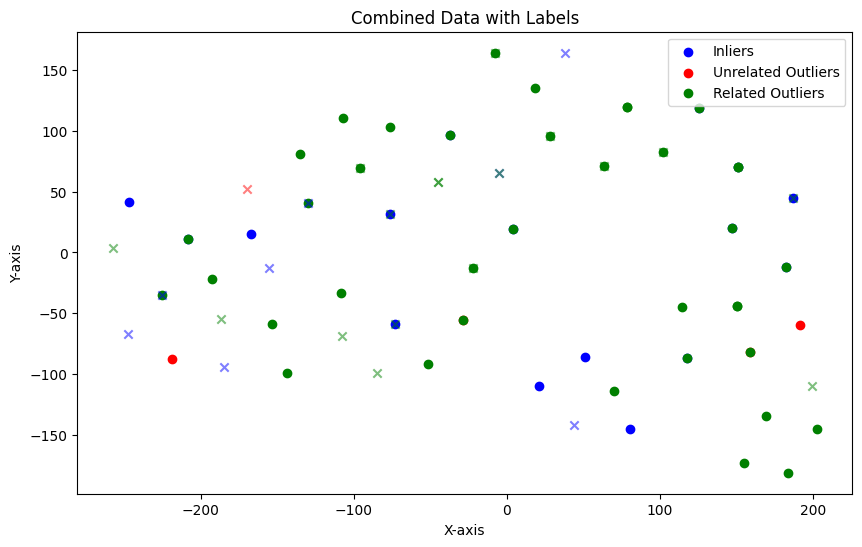

In [46]:

X_combined = combined_mnsit_2d


# To create an array to store the target labels for combined_mnsit_2d

num_inliers = inliers.shape[0]  # Number of inliers
num_unrelated_outliers = unrelated_outliers.shape[0]  # Number of unrelated outliers
num_related_outliers = related_outliers.shape[0]  # Number of related outliers


y_combined = np.zeros(combined_mnsit_2d.shape[0], dtype=int)




# To assign labels to each category
# Inliers are labeled as 0, unrelated outliers as 1, and related outliers as 2
y_combined[:num_inliers] = 0
y_combined[num_inliers:num_inliers + num_unrelated_outliers] = 1
y_combined[num_inliers + num_unrelated_outliers:] = 2



# to split the data into a training and testing set
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_combined, y_train_combined)



# to predict the classes of the testing set
y_pred_combined = knn.predict(X_test_combined)



# to calculate the accuracy
accuracy_mnsit_model = accuracy_score(y_test_combined, y_pred_combined)
print("k-NN Accuracy :", accuracy_mnsit_model)






# to create a scatter plot for the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_combined[y_train_combined == 0][:, 0], X_train_combined[y_train_combined == 0][:, 1], label='Inliers', c='blue')
plt.scatter(X_train_combined[y_train_combined == 1][:, 0], X_train_combined[y_train_combined == 1][:, 1], label='Unrelated Outliers', c='red')
plt.scatter(X_train_combined[y_train_combined == 2][:, 0], X_train_combined[y_train_combined == 2][:, 1], label='Related Outliers', c='green')

# to create a scatter plot for the testing data
plt.scatter(X_test_combined[y_test_combined == 0][:, 0], X_test_combined[y_test_combined == 0][:, 1], c='blue', marker='x', alpha=0.5)
plt.scatter(X_test_combined[y_test_combined == 1][:, 0], X_test_combined[y_test_combined == 1][:, 1], c='red', marker='x', alpha=0.5)
plt.scatter(X_test_combined[y_test_combined == 2][:, 0], X_test_combined[y_test_combined == 2][:, 1], c='green', marker='x', alpha=0.5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Combined Data with Labels')
plt.legend(loc='best')
plt.show()
